In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [144]:
import numpy as np
import pandas as pd

In [3]:
Iris = pd.read_csv('iris (1).csv')

In [5]:
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa


In [6]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [9]:
iris=Iris.fillna(Iris.median())

In [15]:
iris.head(70)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [12]:
iris['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

In [16]:
Species2 = {'Iris-setosa': 1,'Iris-virginica': 2, 'Iris-versicolor':3}

In [17]:
iris.Species = [Species2[item] for item in iris.Species] 
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5           1.40           0.2        1
1      2            4.9           3.0           1.40           0.2        1
2      3            4.7           3.2           1.30           0.2        1
3      4            4.6           3.1           1.50           0.2        1
4      5            5.0           3.6           1.40           0.2        1
5      6            5.4           3.9           1.70           0.4        1
6      7            4.6           3.4           1.40           0.3        1
7      8            5.0           3.4           1.50           0.2        1
8      9            4.4           2.9           1.40           0.2        1
9     10            4.9           3.1           1.50           0.1        1
10    11            5.4           3.7           1.50           0.2        1
11    12            4.8           3.4           1.60           0.2        1
12    13    

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [18]:
corr = iris.corr()

In [19]:
corr #since no corelation is between the given range so not dropping any column.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.462141
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.460028
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.612102
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.648618
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.579519
Species,0.462141,0.460028,-0.612102,0.648618,0.579519,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [20]:
iris.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.662252
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

In [22]:
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline


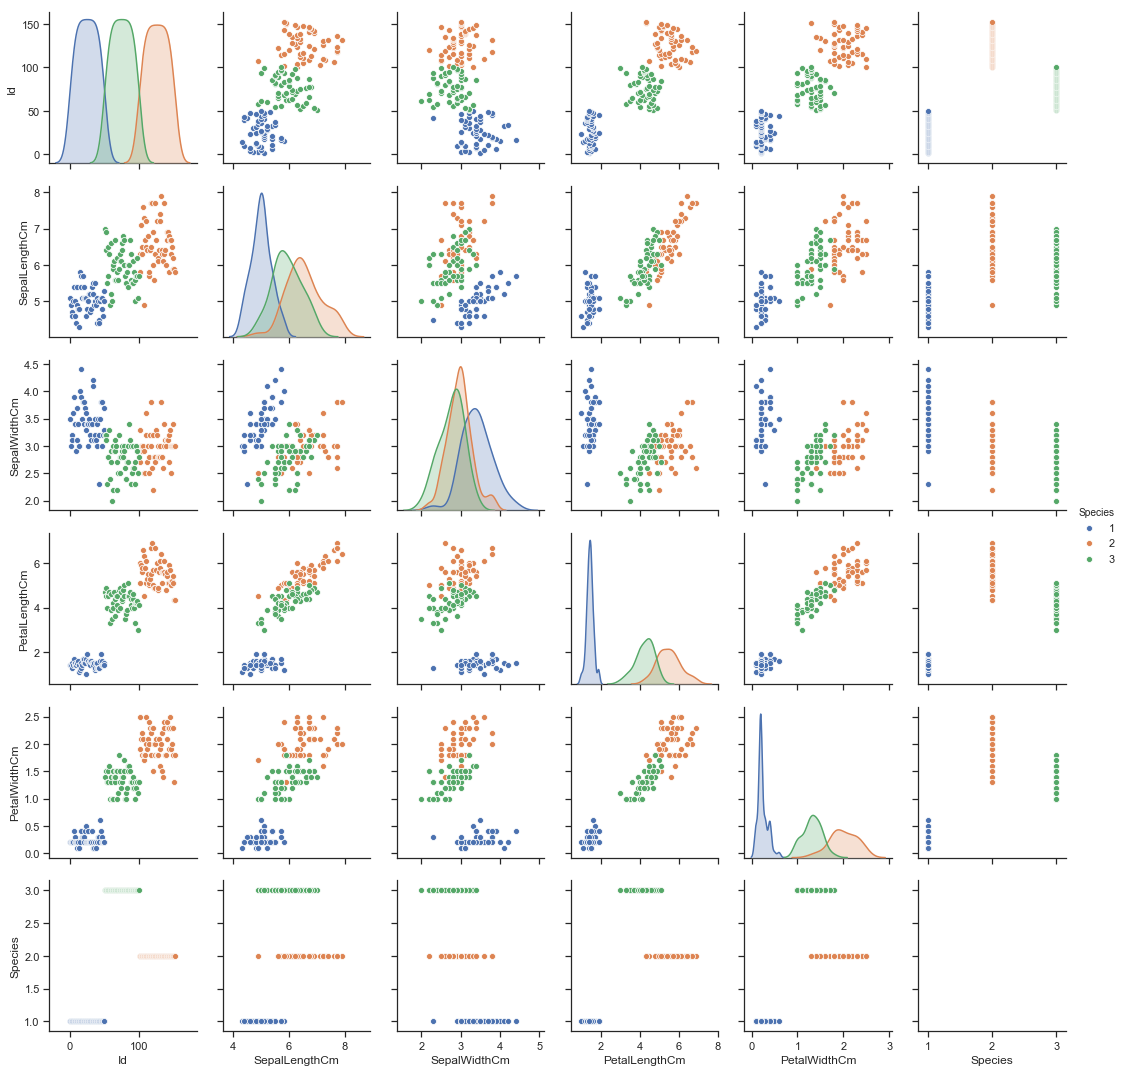

In [177]:
import seaborn as sns

sns.pairplot(iris, hue="Species" ) #since scatter_matrix()function is not showing in my pandas library i used pairplot as suggested by the lab invigilator.

# Split the dataset into training and test sets


# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y = iris['Species']
X = iris.drop(['Id', 'Species'], axis = 1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [115]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,1
1,2,4.9,3.0,1.40,0.2,1
2,3,4.7,3.2,1.30,0.2,1
3,4,4.6,3.1,1.50,0.2,1
4,5,5.0,3.6,1.40,0.2,1
5,6,5.4,3.9,1.70,0.4,1
6,7,4.6,3.4,1.40,0.3,1
7,8,5.0,3.4,1.50,0.2,1
8,9,4.4,2.9,1.40,0.2,1
9,10,4.9,3.1,1.50,0.1,1


In [116]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,4.7,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
5,5.4,3.9,1.70,0.4
6,4.6,3.4,1.40,0.3
7,5.0,3.4,1.50,0.2
8,4.4,2.9,1.40,0.2
9,4.9,3.1,1.50,0.1


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [133]:
model = KNeighborsClassifier(n_neighbors = 3)

In [134]:
X_train.shape

(121, 4)

In [135]:
model=model.fit(X_train, y_train)

In [136]:
y_pred = model.predict(X_test)

In [137]:
accuracy_score(y_test, y_pred)

0.9354838709677419

In [138]:
model = KNeighborsClassifier(n_neighbors = 5)
X_train.shape
model=model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [139]:
model = KNeighborsClassifier(n_neighbors = 9)
X_train.shape
model=model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.967741935483871

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [148]:
a=np.arange(1,20)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [151]:
acc=[]
for i in a:
    model = KNeighborsClassifier(n_neighbors = i)
    X_train.shape
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    

In [171]:
acc

[0.9354838709677419,
 0.8709677419354839,
 0.9354838709677419,
 0.9032258064516129,
 1.0,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871]

In [160]:
b=[]
for i in acc:
    b.append(1-i)

In [173]:
b

[0.06451612903225812,
 0.12903225806451613,
 0.06451612903225812,
 0.09677419354838712,
 0.0,
 0.06451612903225812,
 0.06451612903225812,
 0.06451612903225812,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004]

In [174]:
min(b)

0.0

In [175]:
b.index(0.0)

4

In [168]:
model = KNeighborsClassifier(n_neighbors = 5) #model with lowest MSE
X_train.shape
model=model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

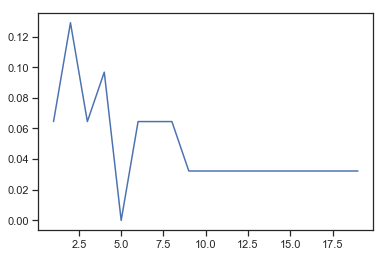

In [170]:
plt.plot(a, b)

### Question 11: Read the data given in bc2.csv file

### Question 12: Observe the no.of records in dataset and type of each feature 

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

### Check Missing Values

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

### Question 15: Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

### convert the datatype of Bare Nuclei to `int`

### Question 16: Standardization of Data

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

### Question 18: Divide the dataset into feature set and target set

### Divide the Training and Test sets in 70:30 

## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

### Question 20: Print the optimal number of neighbors